![k-mean clustering](./img/clustering.png)

In [2]:
import pandas as pd

from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"./data/uberdataset/uber_clean.csv")
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


In [4]:
x = df[["Lat", "Lon"]]
x.head()

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047


In [19]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(x)

In [20]:
df['y'] = y_kmeans

In [21]:
df.head()

,Date/Time,Lat,Lon,Base,Date,y
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday,0
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday,0
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday,1
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday,0
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday,1


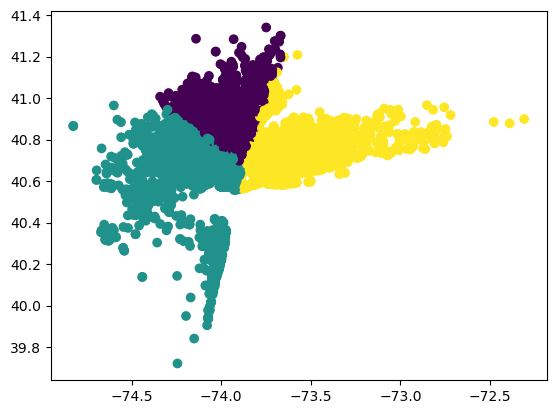

In [22]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])

In [23]:
model.inertia_

1957.7361361974065

In [17]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

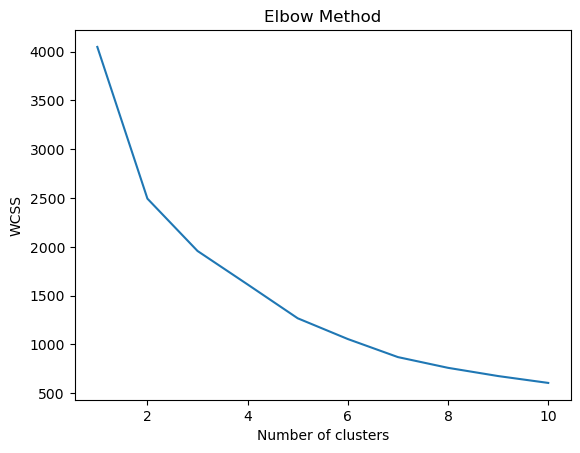

In [18]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [25]:
df = df[:2000]

cluster1 = df[['Lat', "Lon"]][df['y'] == 0].values.tolist()
cluster2 = df[['Lat', "Lon"]][df['y'] == 1].values.tolist()
cluster3 = df[['Lat', "Lon"]][df['y'] == 2].values.tolist()


In [27]:
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles = "openstreetmap")
map

In [30]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)
    
for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)

In [31]:
map